In [1]:
#!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import os

In [3]:
#S&P 500 index is a market-capitalization-weighted index of 500 of the largest publicly traded companies in the US.
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [4]:
sp500.index = pd.to_datetime(sp500.index)

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-02 00:00:00-04:00,5049.319824,5073.209961,5011.049805,5064.200195,4381660000,0.0,0.0
2024-05-03 00:00:00-04:00,5122.779785,5139.120117,5101.220215,5127.790039,3924990000,0.0,0.0
2024-05-06 00:00:00-04:00,5142.419922,5181.000000,5142.419922,5180.740234,3683250000,0.0,0.0


In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

<Axes: xlabel='Date'>

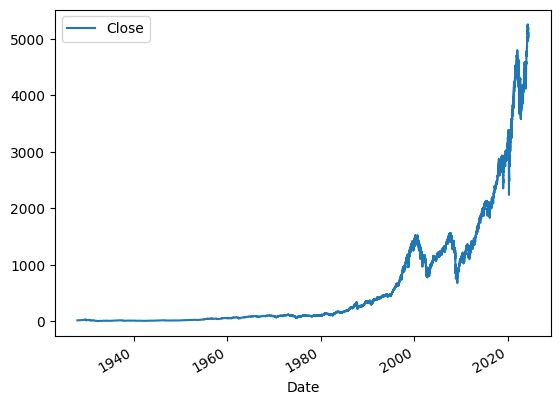

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500 = sp500.loc["2015-01-01":].copy()

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2015-01-02 00:00:00-05:00,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2020.579956,0
2015-01-05 00:00:00-05:00,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2002.609985,0
2015-01-06 00:00:00-05:00,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2025.900024,1
2015-01-07 00:00:00-05:00,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2062.139893,1
2015-01-08 00:00:00-05:00,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2044.810059,0
...,...,...,...,...,...,...,...
2024-05-02 00:00:00-04:00,5049.319824,5073.209961,5011.049805,5064.200195,4381660000,5127.790039,1
2024-05-03 00:00:00-04:00,5122.779785,5139.120117,5101.220215,5127.790039,3924990000,5180.740234,1
2024-05-06 00:00:00-04:00,5142.419922,5181.000000,5142.419922,5180.740234,3683250000,5187.700195,1


In [12]:
sp500.describe()

,Open,High,Low,Close,Volume,Tomorrow,Target
count,2353.000000,2353.000000,2353.000000,2353.000000,2.353000e+03,2352.000000,2353.000000
mean,3197.064677,3214.377668,3178.450794,3197.569711,4.016057e+09,3198.054137,0.533362
std,928.980772,934.538826,923.570324,929.344412,9.613390e+08,929.244852,0.498992
min,1833.400024,1847.000000,1810.099976,1829.079956,1.296530e+09,1829.079956,0.000000
25%,2387.709961,2392.929932,2377.179932,2387.449951,3.423160e+09,2387.959900,0.000000
50%,2919.350098,2932.159912,2907.409912,2923.429932,3.824030e+09,2923.539917,1.000000
75%,4082.550049,4109.500000,4061.409912,4088.850098,4.362880e+09,4089.232544,1.000000
max,5257.970215,5264.850098,5245.819824,5254.350098,9.976520e+09,5254.350098,1.000000


In [13]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

# Check Datatype

In [14]:
sp500.dtypes

Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Tomorrow    float64
Target        int64
dtype: object

In [15]:
sp500['Volume'] = sp500['Volume'].astype(float)

sp500.dtypes

Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Tomorrow    float64
Target        int64
dtype: object

In [16]:
# Null value check
sp500.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    1
Target      0
dtype: int64

In [17]:
def clean_dataset(sp500):
    assert isinstance(sp500, pd.DataFrame), "df needs to be a pd.DataFrame"
    sp500.dropna(inplace=True)
    indices_to_keep = ~sp500.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return sp500[indices_to_keep].astype(np.float64)

In [18]:
import numpy as np

sp500 = clean_dataset(sp500)

In [19]:
# Null value check
sp500.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    0
Target      0
dtype: int64

# Correlation

In [20]:
# scatter plot of examples by class label
X = sp500.drop(columns = ['Target']) # X contains the features
Y= sp500['Target']

In [21]:
X.shape


(2352, 6)

In [22]:
Y.shape

(2352,)

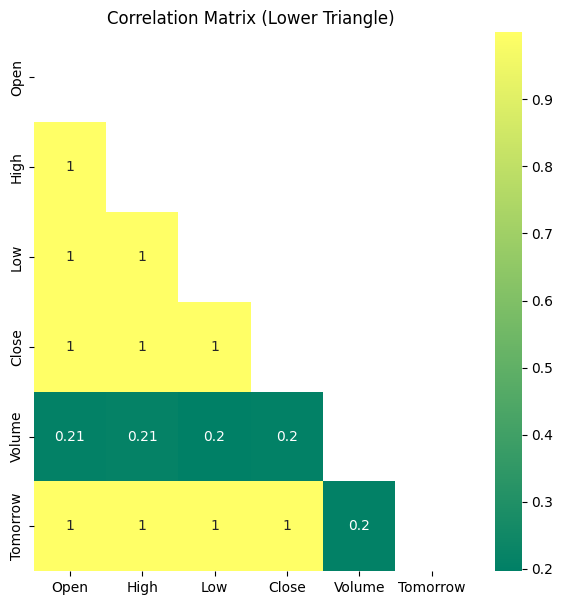

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming sp500 is your DataFrame containing the S&P 500 data
corr_matrix = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='summer', mask=mask)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()


# Checking Data Distribution

In [24]:
from collections import Counter
counter = Counter(Y)

In [25]:
print(counter)

Counter({1.0: 1255, 0.0: 1097})


Class=0, n=1097 (46.641%)
Class=1, n=1255 (53.359%)


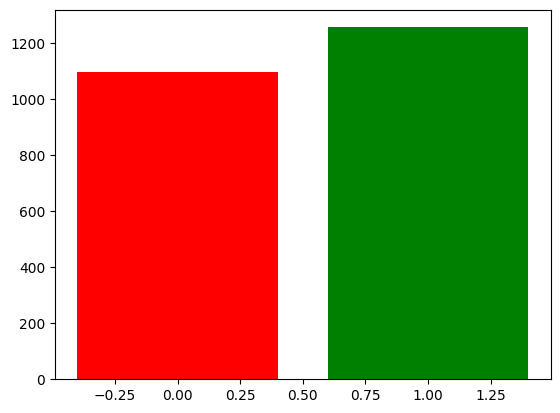

In [26]:
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'green'])
plt.show()

# Random Forest

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    stratify=Y,
                                                    test_size=0.20,
                                                    random_state =42)

In [28]:
X_train.shape

(1881, 6)

In [29]:
y_test.shape

(471,)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [31]:
from sklearn.ensemble import RandomForestClassifier
RFclassifer = RandomForestClassifier()
RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
y_train_pred = RFclassifer.predict(X_train)
print('Train Accuracy %s' % RFclassifer.score(X_train, y_train))
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy 1.0
Test Accuracy 0.8131634819532909
Precision Score :  0.8131634819532909
Recall Score :  0.8131634819532909
F1-Score Score :  0.8131634819532909
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       220
         1.0       0.81      0.84      0.83       251

    accuracy                           0.81       471
   macro avg       0.81      0.81      0.81       471
weighted avg       0.81      0.81      0.81       471



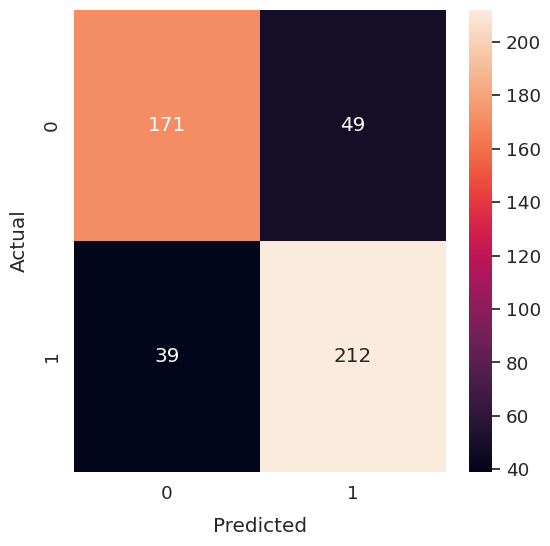

In [32]:
#importing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.2)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d'
)

ax.set_xlabel("Predicted", labelpad=10)
ax.set_ylabel("Actual", labelpad=10)
plt.show()

# Apply Random Search With RF

In [33]:
#creating Search Space
from scipy.stats import randint

random_forest_space = {
    'n_estimators': np.arange(1, 500, step=50),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'min_samples_split': np.arange(2, 10, step=2),
    'min_samples_leaf': randint(1, 4),
    'max_features': randint(1, 7)
}

In [34]:
#finding best hyperparameter
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, random_forest_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)

print('Best hyperparamete are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparamete are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 151}
Best score is: 0.8011696484000226


In [35]:
# create a Random Forest Classifier object with the best hyperparameters
rf = RandomForestClassifier(**model_random.best_params_)

# fit the model on the training data
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
print('Train Accuracy : %s' % rf.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.9973418394471026
Test Accuracy : 0.8471337579617835
Precision Score :  0.8471337579617835
Recall Score :  0.8471337579617835
F1-Score Score :  0.8471337579617836
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       220
         1.0       0.85      0.87      0.86       251

    accuracy                           0.85       471
   macro avg       0.85      0.85      0.85       471
weighted avg       0.85      0.85      0.85       471



# Xgboost

In [36]:
from xgboost import XGBClassifier
XGclassifer = XGBClassifier()
XGclassifer.fit(X_train, y_train)
y_pred = XGclassifer.predict(X_test)
y_train_pred = XGclassifer.predict(X_train)
print('Train Accuracy : %s' % XGclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.9760765550239234
Test Accuracy : 0.8131634819532909
Precision Score :  0.8131634819532909
Recall Score :  0.8131634819532909
F1-Score Score :  0.8131634819532909
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       220
         1.0       0.81      0.86      0.83       251

    accuracy                           0.81       471
   macro avg       0.81      0.81      0.81       471
weighted avg       0.81      0.81      0.81       471



# Apply Random Search With XGB

In [37]:
from scipy.stats import randint, uniform

xgboost_space = {
    'max_depth': randint(1, 11),
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(50, 500),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

In [38]:
#finding best hyperparameter
from sklearn.model_selection import RandomizedSearchCV

XGB = XGBClassifier()
XGB_random = RandomizedSearchCV(XGB, xgboost_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
model_random = XGB_random.fit(X_train, y_train)

print('Best hyperparamete are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparamete are: {'colsample_bytree': 0.9261531666759274, 'gamma': 0.34962818733302625, 'learning_rate': 0.11276207261040487, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 439, 'reg_alpha': 0.015282383842023739, 'reg_lambda': 0.22885731255219377, 'subsample': 0.8489515100811132}
Best score is: 0.7921313279530448


In [39]:
# create a Random Forest Classifier object with the best hyperparameters
XGB = XGBClassifier(**model_random.best_params_)

# fit the model on the training data
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
y_train_pred = XGB.predict(X_train)
print('Train Accuracy : %s' % XGB.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.9824561403508771
Test Accuracy : 0.8259023354564756
Precision Score :  0.8259023354564756
Recall Score :  0.8259023354564756
F1-Score Score :  0.8259023354564756
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       220
         1.0       0.83      0.85      0.84       251

    accuracy                           0.83       471
   macro avg       0.83      0.82      0.82       471
weighted avg       0.83      0.83      0.83       471



# SVM

In [40]:
from sklearn.svm import SVC
SVMclassifer = SVC(probability=True)
SVMclassifer .fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
y_train_pred = SVMclassifer.predict(X_train)
print('Train Accuracy : %s' % SVMclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.5337586390217969
Test Accuracy : 0.5329087048832272
Precision Score :  0.5329087048832272
Recall Score :  0.5329087048832272
F1-Score Score :  0.5329087048832272
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       220
         1.0       0.53      1.00      0.70       251

    accuracy                           0.53       471
   macro avg       0.27      0.50      0.35       471
weighted avg       0.28      0.53      0.37       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [41]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to be 3-dimensional for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

# Predictions
y_train_pred = model.predict(X_train_reshaped)
y_test_pred = model.predict(X_test_reshaped)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 - 2s - 27ms/step - loss: 0.3549 - val_loss: 0.2960
Epoch 2/50
59/59 - 0s - 3ms/step - loss: 0.2837 - val_loss: 0.2753
Epoch 3/50
59/59 - 0s - 4ms/step - loss: 0.2679 - val_loss: 0.2614
Epoch 4/50
59/59 - 0s - 6ms/step - loss: 0.2581 - val_loss: 0.2544
Epoch 5/50
59/59 - 0s - 4ms/step - loss: 0.2544 - val_loss: 0.2508
Epoch 6/50
59/59 - 0s - 3ms/step - loss: 0.2506 - val_loss: 0.2492
Epoch 7/50
59/59 - 0s - 5ms/step - loss: 0.2516 - val_loss: 0.2486
Epoch 8/50
59/59 - 0s - 6ms/step - loss: 0.2513 - val_loss: 0.2483
Epoch 9/50
59/59 - 0s - 3ms/step - loss: 0.2495 - val_loss: 0.2481
Epoch 10/50
59/59 - 0s - 5ms/step - loss: 0.2505 - val_loss: 0.2482
Epoch 11/50
59/59 - 0s - 5ms/step - loss: 0.2503 - val_loss: 0.2486
Epoch 12/50
59/59 - 0s - 5ms/step - loss: 0.2514 - val_loss: 0.2478
Epoch 13/50
59/59 - 0s - 5ms/step - loss: 0.2489 - val_loss: 0.2490
Epoch 14/50
59/59 - 0s - 6ms/step - loss: 0.2495 - val_loss: 0.2486
Epoch 15/50
59/59 - 0s - 5ms/step - loss: 0.2502 - val_loss: 0.2478

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute Mean Absolute Error
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)


Train Mean Squared Error: 0.24350360740485516
Test Mean Squared Error: 0.24390111881602752
Train Mean Absolute Error: 0.4924012338272249
Test Mean Absolute Error: 0.49277087837267836


In [55]:
# Evaluate LSTM model
train_accuracy = model.evaluate(X_train_reshaped, y_train, verbose=0)
test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Check if the accuracy values are floats
if isinstance(train_accuracy, float):
    # If so, just use them directly
    print('Train Accuracy :', train_accuracy)
else:
    # Otherwise, extract the accuracy value
    print('Train Accuracy :', train_accuracy[1])

if isinstance(test_accuracy, float):
    print('Test Accuracy :', test_accuracy)
else:
    print('Test Accuracy :', test_accuracy[1])

y_train_pred_labels = (y_train_pred > 0.5).astype(int)
y_test_pred_labels = (y_test_pred > 0.5).astype(int)

precision = precision_score(y_test, y_test_pred_labels, average='micro')
recall = recall_score(y_test, y_test_pred_labels, average='micro')
f1 = f1_score(y_test, y_test_pred_labels, average='micro')

print('Precision Score :', precision)
print('Recall Score :', recall)
print('F1-Score :', f1)

print(classification_report(y_test, y_test_pred_labels))


Train Accuracy : 0.2435036152601242
Test Accuracy : 0.24390113353729248
Precision Score : 0.5711252653927813
Recall Score : 0.5711252653927813
F1-Score : 0.5711252653927813
              precision    recall  f1-score   support

         0.0       0.75      0.12      0.21       220
         1.0       0.56      0.96      0.71       251

    accuracy                           0.57       471
   macro avg       0.65      0.54      0.46       471
weighted avg       0.65      0.57      0.47       471





# Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
NBclassifer = MultinomialNB()
NBclassifer .fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
y_train_pred = NBclassifer.predict(X_train)
print('Train Accuracy : %s' % NBclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.507177033492823
Test Accuracy : 0.5095541401273885
Precision Score :  0.5095541401273885
Recall Score :  0.5095541401273885
F1-Score Score :  0.5095541401273885
              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49       220
         1.0       0.54      0.52      0.53       251

    accuracy                           0.51       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.51      0.51      0.51       471



# AdaBoost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ADBclassifer = AdaBoostClassifier()
ADBclassifer.fit(X_train, y_train)
y_pred = ADBclassifer.predict(X_test)
y_train_pred = ADBclassifer.predict(X_train)
print('Train Accuracy : %s' % ADBclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.6496544391281234
Test Accuracy : 0.5690021231422505
Precision Score :  0.5690021231422505
Recall Score :  0.5690021231422505
F1-Score Score :  0.5690021231422505
              precision    recall  f1-score   support

         0.0       0.56      0.36      0.44       220
         1.0       0.57      0.75      0.65       251

    accuracy                           0.57       471
   macro avg       0.57      0.56      0.55       471
weighted avg       0.57      0.57      0.55       471



# Logistics Regression

In [59]:
from sklearn.linear_model import LogisticRegression
LRclassifer = LogisticRegression()
LRclassifer.fit(X_train, y_train)
y_pred = LRclassifer.predict(X_test)
y_train_pred = LRclassifer.predict(X_train)
print('Train Accuracy : %s' % LRclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.5337586390217969
Test Accuracy : 0.5329087048832272
Precision Score :  0.5329087048832272
Recall Score :  0.5329087048832272
F1-Score Score :  0.5329087048832272
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       220
         1.0       0.53      1.00      0.70       251

    accuracy                           0.53       471
   macro avg       0.27      0.50      0.35       471
weighted avg       0.28      0.53      0.37       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree


In [61]:
from sklearn.tree import DecisionTreeClassifier
DTclassifer= DecisionTreeClassifier()
DTclassifer.fit(X_train, y_train)
y_pred = DTclassifer.predict(X_test)
y_train_pred = DTclassifer.predict(X_train)
print('Train Accuracy : %s' % DTclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred,
                                           average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 1.0
Test Accuracy : 0.7558386411889597
Precision Score :  0.7558386411889597
Recall Score :  0.7558386411889597
F1-Score Score :  0.7558386411889597
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       220
         1.0       0.78      0.75      0.77       251

    accuracy                           0.76       471
   macro avg       0.76      0.76      0.76       471
weighted avg       0.76      0.76      0.76       471



# Apply Random Search With DT

In [62]:
DTclassifer.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [63]:
decision_tree_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(randint(1, 20).rvs(10)),
    'min_samples_split': randint(1, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [64]:
#finding best hyperparameter
DTC= DecisionTreeClassifier()
DTClassifier = RandomizedSearchCV(DTC, decision_tree_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
DTClassifier.fit(X_train, y_train)

print('Best hyperparameters are: '+str(DTClassifier.best_params_))
print('Best score is: '+str(DTClassifier.best_score_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 7, 'splitter': 'best'}
Best score is: 0.7113070715051639


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
85 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

In [65]:
# create a SVM Classifier object with the best hyperparameters
DTClassifier = DecisionTreeClassifier(**DTClassifier.best_params_)

# fit the model on the training data
DTClassifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = DTClassifier.predict(X_test)

# compute evaluation metrics
print('Train Accuracy : %s' % DTClassifier.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, average='micro'))

print(classification_report(y_test, y_pred))

Train Accuracy : 0.8952684742158427
Test Accuracy : 0.7579617834394905
Precision Score :  0.7579617834394905
Recall Score :  0.7579617834394905
F1-Score Score :  0.7579617834394905
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       220
         1.0       0.78      0.76      0.77       251

    accuracy                           0.76       471
   macro avg       0.76      0.76      0.76       471
weighted avg       0.76      0.76      0.76       471

